# PyLunch Nova 
## December 12th, 2017 

## [03.11 Working with Time Series](PythonDataScienceHandbook/notebooks/03.11-Working-with-Time-Series.ipynb)

## Astropy time comparisons

In [73]:
import numpy as np

from astropy import time
from astropy import units as u

In [74]:
%matplotlib inline
from matplotlib import pyplot as plt

Astropy provides a Time object that has features that are more astro-appropriate, including time scales and 

In [76]:
now = time.Time.now()
now

<Time object: scale='utc' format='datetime' value=2017-11-28 18:50:03.481287>

In [77]:
list(time.Time.FORMATS)

['jd',
 'mjd',
 'decimalyear',
 'unix',
 'cxcsec',
 'gps',
 'plot_date',
 'datetime',
 'iso',
 'isot',
 'yday',
 'fits',
 'byear',
 'jyear',
 'byear_str',
 'jyear_str']

In [78]:
list(time.Time.SCALES)

['tai', 'tcb', 'tcg', 'tdb', 'tt', 'ut1', 'utc']

MJD is a "format" - basically a "view" of a specific time

In [82]:
now.iso

'2017-11-28 18:50:03.481'

Formats are basically "views"

In [85]:
now.jd

2458086.2847625148

In [84]:
now.format = 'jd'
now

<Time object: scale='utc' format='jd' value=2458086.2847625148>

Scales are different ways of *measuring* time.  (For more on formats vs scales see [the astropy time docs](http://docs.astropy.org/en/stable/time/index.html))

For example, UT1  is the time scale that is tied to the rotation of the *earth*, rather than being a continuously increasing count.  TAI is a continuous count, while UTC is TAI with leap seconds to keep it near 0.

In [86]:
now.ut1

<Time object: scale='ut1' format='datetime' value=2017-11-28 18:50:03.733544>

Lets look at how these time scales differ.  To do that we have to create a time series.  But for astropy the time series is the *same class* as the scalar times.  In this way it is more like numpy than like Pandas.

In [87]:
center = time.Time(2458086, format='jd')
print(center.datetime)
center

2017-11-28 12:00:00


<Time object: scale='utc' format='jd' value=2458086.0>

In [89]:
ts = center + np.linspace(-3, 1, 1001)*u.year
ts

<Time object: scale='utc' format='jd' value=[ 2456990.25002315  2456991.71102315  2456993.17202315 ...,  2458448.328
  2458449.789       2458451.25      ]>

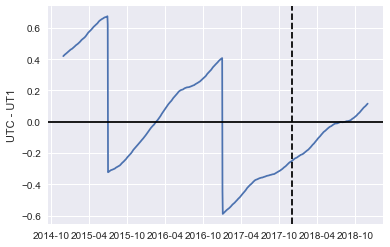

In [90]:
dut1 = ((ts.utc.jd - ts.ut1.jd)*u.day).to(u.second)

plt.plot_date(ts.plot_date, dut1, '-')
plt.axvline(center.plot_date, ls='--', c='k')
plt.axhline(0, color='k')
plt.ylabel('UTC - UT1')

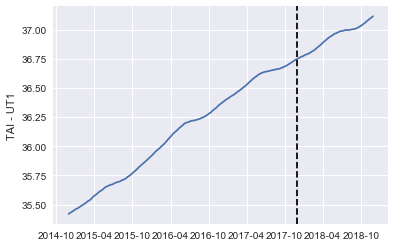

In [91]:
dt = ((ts.tai.jd - ts.ut1.jd)*u.day).to(u.second)

plt.plot_date(ts.plot_date, dt, '-')
plt.axvline(center.plot_date, ls='--', c='k')
plt.ylabel('TAI - UT1')

Additionally, while pains are taken to hide this from the user where possible, astropy is built for astronomy, which means astronomical dynamic ranges.  With that in mind, it can achieve better than ~nanosecond precision over a hubble time:

In [92]:
from astropy import cosmology

In [93]:
# Hubble time, cased on the Planck 2015 cosmological parameters
Ht = 1/cosmology.Planck15.H0
Ht.to(u.Gyr)

<Quantity 14.43448806721477 Gyr>

In [94]:
time2 = now.tai + 1*u.ns
(time2 - now).to(u.ns)

<Quantity 0.9976020010071807 ns>

In [95]:
t2H = time2 - Ht
nowH = now.tai - Ht

(t2H - nowH).to(u.ns)

<Quantity 0.9976020010071807 ns>

Pandas, and other similar Python tools, simply weren't designed for such cases, and tend to either encounter overflow or precision problems:

In [ ]:
import pandas as pd

In [ ]:
dr = pd.date_range('2015-07-03', periods=2, freq='ns')

In [ ]:
dt = dr[1]-dr[0]
dt.nanoseconds

In [ ]:
Htdays = Ht.to(u.day)
Htdays

In [ ]:
pd.Timedelta(Htdays.value, 'D')

In [ ]:
dr - pd.Timedelta((200*u.year).to(u.day).value, 'D')
(dr[1]-dr[0]).nanoseconds

In [ ]:
dr - pd.Timedelta((300*u.year).to(u.day).value, 'D')
(dr[1]-dr[0]).nanoseconds

So Pandas, in "nanosecond" precision, can only represent a dynamic range of a few hundred years

## [03.12 Performance](PythonDataScienceHandbook/notebooks/03.12-Performance-Eval-and-Query.ipynb)

One consideration missing from the last paragraph: *readability*.  *readability counts* is part of the Zen of Python:

In [ ]:
import this

## [03.13 Resources](PythonDataScienceHandbook/notebooks/03.13-Further-Resources.ipynb)

(No code content)